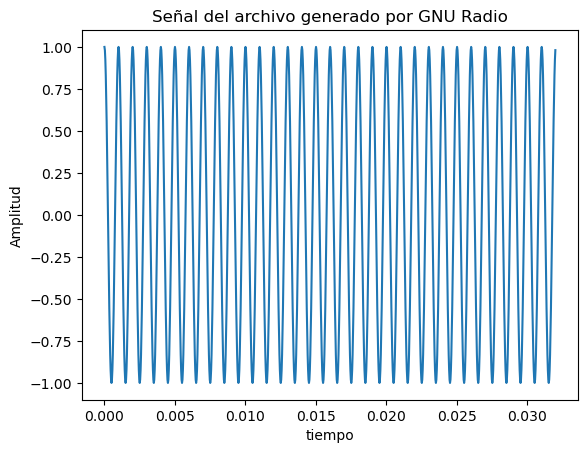

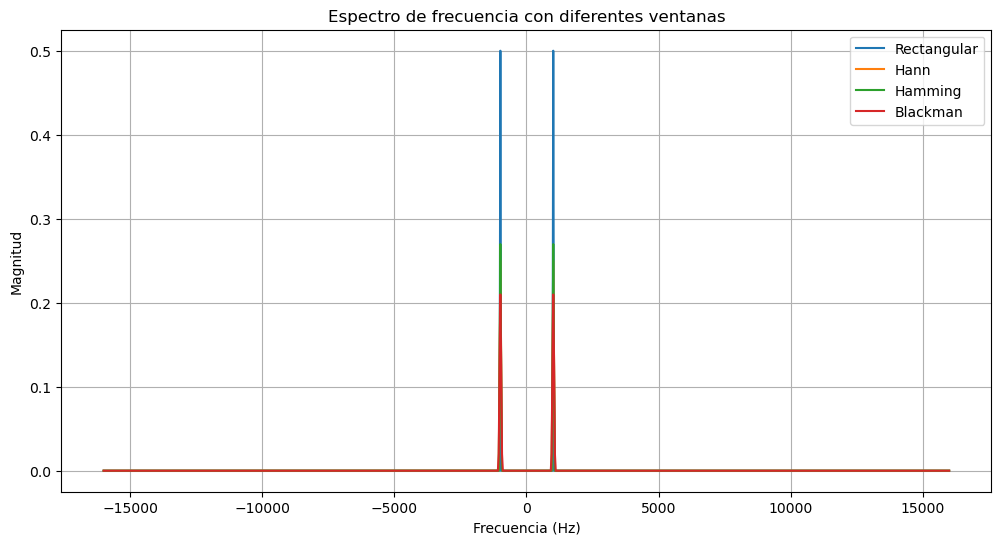

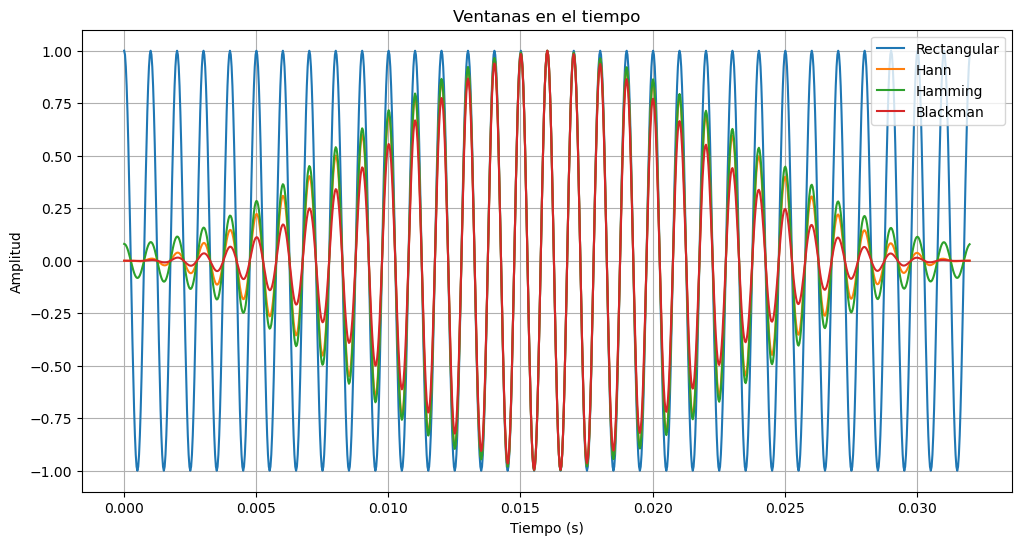

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# Tomo solo 1024 muestras de todo el archivo creado
filename = "TP1-1g-datos.bin"
n_samples=1024

# Cargo los datos del archivo en vector
with open(filename, "rb") as data:
    data = np.fromfile(data, dtype=np.float32, count=n_samples)

N=len(data)
fs=32e3
tf=N*1/fs
t=np.linspace(0,tf,N)

# Grafico la señal
plt.plot(t,data)
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.title('Señal del archivo generado por GNU Radio')
plt.show()

# Aplico diferentes ventanas a los datos
rect = data * signal.windows.boxcar(len(data))
hann = data * signal.windows.hann(len(data))
hamming = data * signal.windows.hamming(len(data))
blackman = data * signal.windows.blackman(len(data))

# En la frecuencia
fcia=np.linspace(-fs/2,fs/2,N)

F_rect=np.abs(np.fft.fftshift(np.fft.fft(rect)))/N
F_hann=np.abs(np.fft.fftshift(np.fft.fft(hann)))/N
F_hamming=np.abs(np.fft.fftshift(np.fft.fft(hamming)))/N
F_blackman=np.abs(np.fft.fftshift(np.fft.fft(blackman)))/N


# Graficar los espectros de frecuencia
plt.figure(figsize=(12, 6))
plt.plot(fcia, F_rect, label='Rectangular')
plt.plot(fcia, F_hann, label='Hann')
plt.plot(fcia, F_hamming, label='Hamming')
plt.plot(fcia, F_blackman, label='Blackman')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de frecuencia con diferentes ventanas')
plt.legend()
plt.grid()

# Graficar las ventanas en el tiempo
plt.figure(figsize=(12, 6))
plt.plot(t, rect, label='Rectangular')
plt.plot(t, hann, label='Hann')
plt.plot(t, hamming, label='Hamming')
plt.plot(t, blackman, label='Blackman')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Ventanas en el tiempo')
plt.legend()
plt.grid()


